# EDA archivo 2017PurchasePriceDec

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#carga archivo csv
df = pd.read_csv(r"C:\Users\User\OneDrive - Institucion Universitaria Colegio Mayor de Antioquia\Escritorio\Proyecto_Final_Henry\PF-Inventory\Data\2017PurchasePricesDec.csv")

In [3]:
print(df.head())

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None


In [5]:
print(df.describe()) # # Obtener estadísticas descriptivas de las variables numéricas

              Brand         Price  Classification  PurchasePrice  \
count  12261.000000  12261.000000    12261.000000   12261.000000   
mean   17989.067123     38.640240        1.708996      26.488220   
std    12528.503464    206.151172        0.454244     156.182948   
min       58.000000      0.000000        1.000000       0.000000   
25%     5990.000000     10.990000        1.000000       6.890000   
50%    18788.000000     15.990000        2.000000      10.650000   
75%    25117.000000     29.990000        2.000000      20.130000   
max    90631.000000  13999.900000        2.000000   11111.030000   

        VendorNumber  
count   12261.000000  
mean    10814.861757  
std     19007.682322  
min         2.000000  
25%      3960.000000  
50%      7153.000000  
75%      9552.000000  
max    173357.000000  


In [6]:
# Identificar la cantidad de valores nulos en cada columna
print("Valores nulos antes de la limpieza:\n", df.isnull().sum())

Valores nulos antes de la limpieza:
 Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


# Limpieza y manejo de datos nulos (ETL)

In [7]:
# Limpiar valores nulos
df.fillna({
    'Description': 'Unknown',
    'Size': 'Unknown',
    'Volume': 'Unknown'
}, inplace=True)


In [8]:
# Verificar que no queden valores nulos
print("Valores nulos después de la limpieza:\n", df.isnull().sum())

Valores nulos después de la limpieza:
 Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


In [9]:
# Creamos un diccionario con los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'Brand': 'MarcaID',
    'Description': 'Descripcion',
    'Price': 'Precio_venta',
    'Size': 'Tamaño',
    'Volume': 'Volumen',
    'Classification': 'Clasificacion',
    'PurchasePrice': 'Precio_compra',
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Nombre_proveedor',
    'Pack': 'Pack'
}

# Renombramos las columnas
df.rename(columns=column_renames, inplace=True)

In [10]:
print(df.head())  # Mostrar las primeras filas del DataFrame para verificar los cambios

   MarcaID                  Descripcion  Precio_venta Tamaño Volumen  \
0       58  Gekkeikan Black & Gold Sake         12.99  750mL     750   
1       62     Herradura Silver Tequila         36.99  750mL     750   
2       63   Herradura Reposado Tequila         38.99  750mL     750   
3       72         No. 3 London Dry Gin         34.99  750mL     750   
4       75    Three Olives Tomato Vodka         14.99  750mL     750   

   Clasificacion  Precio_compra  ProveedorID             Nombre_proveedor  
0              1           9.28         8320  SHAW ROSS INT L IMP LTD      
1              1          28.67         1128  BROWN-FORMAN CORP            
2              1          30.46         1128  BROWN-FORMAN CORP            
3              1          26.11         9165  ULTRA BEVERAGE COMPANY LLP   
4              1          10.94         7245  PROXIMO SPIRITS INC.         


## Análisis de Relaciones entre Variables y Visualización de Distribuciones

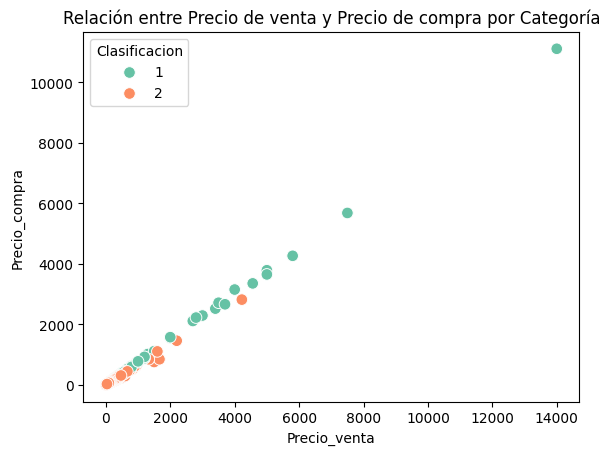

In [15]:
# Gráfico de dispersión diferenciando por categorías
sns.scatterplot(
    data=df,
    x='Precio_venta',
    y='Precio_compra',
    hue='Clasificacion',        # Columna para diferenciar colores
    palette='Set2',         # Paleta de colores opcional (Set1, Set2, coolwarm, etc.)
    s=70                    # Tamaño de los puntos
)

plt.title('Relación entre Precio de venta y Precio de compra por Categoría')
plt.show()

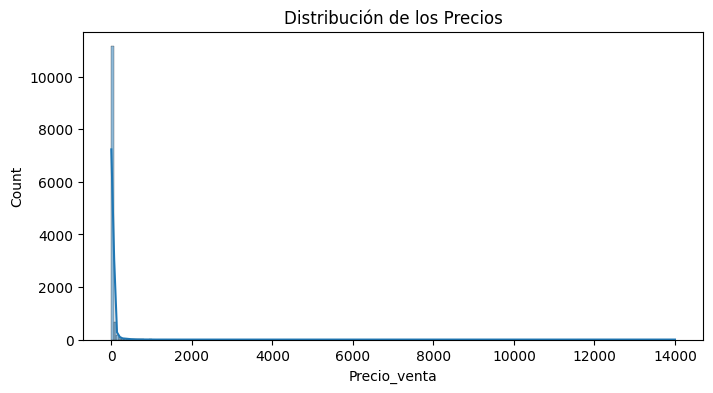

In [16]:
# Distribución de la columna 'Price'
plt.figure(figsize=(8, 4))
sns.histplot(df['Precio_venta'], kde=True)
plt.title('Distribución de los Precios')
plt.show()

## Guardar el dataset limpio

In [17]:
# Guardar el DataFrame transformado
df.to_csv(r'C:\Users\User\OneDrive - Institucion Universitaria Colegio Mayor de Antioquia\Escritorio\Proyecto_Final_Henry\PF-Inventory\EDA\purchasePricesDec_new.csv', index=False)
          

In [18]:
#carga archivo csv
df1 = pd.read_csv(r'C:\Users\User\OneDrive - Institucion Universitaria Colegio Mayor de Antioquia\Escritorio\Proyecto_Final_Henry\PF-Inventory\EDA\purchasePricesDec_new.csv')

In [19]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarcaID           12261 non-null  int64  
 1   Descripcion       12261 non-null  object 
 2   Precio_venta      12261 non-null  float64
 3   Tamaño            12261 non-null  object 
 4   Volumen           12261 non-null  object 
 5   Clasificacion     12261 non-null  int64  
 6   Precio_compra     12261 non-null  float64
 7   ProveedorID       12261 non-null  int64  
 8   Nombre_proveedor  12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None


# EDA Archivo BegInvFINAL21312016

### Se procede a leer el acrchivo 

In [21]:
df_BegInvFINAL = pd.read_csv(r"C:\Users\User\OneDrive - Institucion Universitaria Colegio Mayor de Antioquia\Escritorio\Proyecto_Final_Henry\PF-Inventory\Data\BegInvFINAL12312016.csv")

In [22]:
df_BegInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


### Se exploran los datos del Frame

In [23]:
# Verificar la cantidad de registros y columnas
print(f"Registros: {df_BegInvFINAL.shape[0]}")
print(f"Columnas: {df_BegInvFINAL.shape[1]}")

Registros: 206529
Columnas: 9


In [24]:
df_BegInvFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [25]:
# Vemos que columnas tienen nulos
df_BegInvFINAL.isnull().sum()[df_BegInvFINAL.isnull().sum()>0]

Series([], dtype: int64)

In [26]:
#Confirmamos los nulos de cada columna
df_BegInvFINAL.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

## Se observa que df_BegInvFINAL no tiene valores nulos

In [27]:
# Ver información de las columnas
for columna in df_BegInvFINAL.columns:
    print(columna)
    print(df_BegInvFINAL[columna].describe())
    print('--------------------------------')

InventoryId
count                206529
unique               206529
top       1_HARDERSFIELD_58
freq                      1
Name: InventoryId, dtype: object
--------------------------------
Store
count    206529.000000
mean         42.122457
std          23.191393
min           1.000000
25%          22.000000
50%          42.000000
75%          64.000000
max          79.000000
Name: Store, dtype: float64
--------------------------------
City
count        206529
unique           67
top       MOUNTMEND
freq          14264
Name: City, dtype: object
--------------------------------
Brand
count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64
--------------------------------
Description
count                   206529
unique                    7291
top       Jagermeister Liqueur
freq                       459
Name: Description, dtype: ob

In [28]:
df_BegInvFINAL['startDate'].describe()

count         206529
unique             1
top       2016-01-01
freq          206529
Name: startDate, dtype: object

### Para verificar la columna "startDate"

In [29]:
# Damos formato fecha a la columna "startDate" pero sin volvela indice.
df_BegInvFINAL['startDate'] = pd.to_datetime(df_BegInvFINAL['startDate'])

In [36]:
df_BegInvFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  206529 non-null  object        
 1   Store        206529 non-null  int64         
 2   City         206529 non-null  object        
 3   Brand        206529 non-null  int64         
 4   Description  206529 non-null  object        
 5   Size         206529 non-null  object        
 6   onHand       206529 non-null  int64         
 7   Price        206529 non-null  float64       
 8   startDate    206529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 14.2+ MB


In [30]:
df_BegInvFINAL['startDate'].describe()

count                 206529
mean     2016-01-01 00:00:00
min      2016-01-01 00:00:00
25%      2016-01-01 00:00:00
50%      2016-01-01 00:00:00
75%      2016-01-01 00:00:00
max      2016-01-01 00:00:00
Name: startDate, dtype: object

## Se procede a guardar el archivo 

In [37]:
df.to_csv(r'C:\Users\User\OneDrive - Institucion Universitaria Colegio Mayor de Antioquia\Escritorio\Proyecto_Final_Henry\PF-Inventory\EDA\BegInvFINAL_new.csv', index=False)